# Insurance Prices Prediction using Linear Regression

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
# Importing data
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

In [3]:
# Complete information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# No. of rows & columns
df.shape

(1338, 7)

In [5]:
# Checking for null values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
# Descriptive stats
df.describe(include='all').fillna('-')

,age,sex,bmi,children,smoker,region,charges
count,1338.0,1338,1338.0,1338.0,1338,1338,1338.0
unique,-,2,-,-,2,4,-
top,-,male,-,-,no,southeast,-
freq,-,676,-,-,1064,364,-
mean,39.207025,-,30.663397,1.094918,-,-,13270.422265
std,14.04996,-,6.098187,1.205493,-,-,12110.011237
min,18.0,-,15.96,0.0,-,-,1121.8739
25%,27.0,-,26.29625,0.0,-,-,4740.28715
50%,39.0,-,30.4,1.0,-,-,9382.033
75%,51.0,-,34.69375,2.0,-,-,16639.912515


<Axes: >

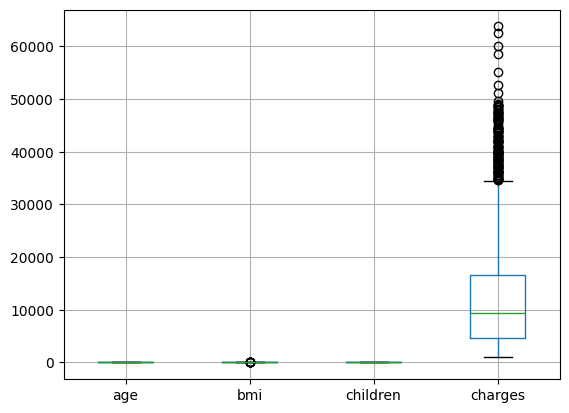

In [7]:
# Checking for outliers
df.boxplot()

In [8]:
# Seperating categorical & numerical data

df_numeric = df.select_dtypes('number')

df_category = df.select_dtypes('object')

In [9]:
df_numeric.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [10]:
df_category.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [11]:
df_category.isnull().sum()

,0
sex,0
smoker,0
region,0


In [12]:
# Outliers treatment
def outlier_treatment(data):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5*IQR)
  upper_bound = Q3 + (1.5*IQR)

  data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
  data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

  return data

In [13]:
df1 = df.copy()
outlier_treatment(df1)

NameError: name 'column' is not defined

In [ ]:
plt.figure(figsize=(15, 20))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

num_colors = len(colors)

c = 1
for i, col2 in enumerate(df1.select_dtypes('number').columns):
    plt.subplot(5, 2, c)

    train_color = colors[c % num_colors]

    sns.boxplot(data=df1[col2], color=train_color)

    plt.xlabel(col2)
    plt.ylabel(col2)
    plt.title(f'Boxplot after outlier treatment of {col2}')

    c += 1

plt.tight_layout()
plt.show()

In [ ]:
Q1 = df1['bmi'].quantile(0.25)
Q3 = df1['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

df1['bmi'] = np.where(df1['bmi'] < lower_bound, lower_bound, df1['bmi'])
df1['bmi'] = np.where(df1['bmi'] > upper_bound, upper_bound, df1['bmi'])

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df["bmi"], color='skyblue')
plt.title('Before Outlier Treatment')
plt.subplot(1, 2, 2)
sns.boxplot(x=df1["bmi"], color='lightgreen')
plt.title('After Outlier Treatment')
plt.show()

In [ ]:
# Correlation analysis
sns.pairplot(df1)

In [ ]:
df_numeric = df1.select_dtypes('number')
df_category = df1.select_dtypes('object')

## Feature Scaling

In [ ]:
df_numeric.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

scaled_df = mms.fit_transform(df_numeric)

scaled_df_numeric = pd.DataFrame(scaled_df, columns=df_numeric.columns)
scaled_df_numeric.head()

## Encoding the categorical columns

In [ ]:
df_category.head()

In [ ]:
encoded_df_category = pd.get_dummies(df_category,dtype=int)

In [ ]:
final_df = df_numeric.join(encoded_df_category)
final_df.head()

## Model Building

In [ ]:
X, Y = final_df.drop('charges', axis=1), df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [ ]:
model = lr.fit(x_train,y_train)

In [ ]:
pred = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)